# ML-MINOR-FEB-ML2B3

### Problem Statement : To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above).
Perform Data Preparation by cleaning the data and removing null values.<br>
Identify Which genres have higher user ratings.<br>
Identify the trend of user ratings based on pricing.<br>
State your inferences.

## Procedure Followed :
1. Dropping rows that have null values for Average User Rating.<br>
2. Dropping irrelevant columns such as URL, ID, Subtitle, etc. <br>
3. Converting the Original Release Date and Current Version Release Date columns to datetime format and introducing a new column called Days to account for the update duration. <br>
4. Dropping rows that have User Rating Count <50 to avoid biased Ratings. <br>
5. Dropping rows that have update duration < 1 month to avoid biased Ratings. <br>
6. Filling the In-app Purchases column with mean of the respective entries. <br>
7. Converting the Size of games to MB from Bytes. <br>
8. Grouping the Genres and dividing into 4 main categories : Entertainment, Action, Puzzle and Education. <br>
9. The Entertainment Category contains all the Genres that contain Entertainment/Music/... <br>
10. The Action Category contains all the Genres containing Action/Adventure/RolePlaying/Simulation/Sports/... <br>
11. The Education Category contains all the Genres containing Education/Books/Word/Lifestyle/... <br>
12. The Puzzle Category contains all the Genres containing Puzzle/Board/... <br>

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sea
import matplotlib as plt
import scipy as sp
import datetime
import statistics as st

In [2]:
games=pd.read_csv(r'C:\Users\harry\Downloads\appstore.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

## Data Cleaning Process Starts Here :

In [3]:
games.drop(['URL','ID','Name','Subtitle','Icon URL','Description','Developer','Primary Genre'],axis=1,inplace=True)
games=games[games['Average User Rating'].notna()]
games['Original Release Date']=pd.to_datetime(games['Original Release Date'])
games['Current Version Release Date']=pd.to_datetime(games['Current Version Release Date'])
games['Days']=games['Current Version Release Date']-games['Original Release Date']
for i in list(games.index.values):
    games['Days'][i]=games['Days'][i].days

#dropping rows with User Rating Count <50
#dropping rows with difference in new version release date of less than a month
games=games[games['User Rating Count']>=50]
games=games[games['Days']>30]

C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\harry\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 16718
Data columns (total 11 columns):
Average User Rating             3190 non-null float64
User Rating Count               3190 non-null float64
Price                           3190 non-null float64
In-app Purchases                2348 non-null object
Age Rating                      3190 non-null object
Languages                       3181 non-null object
Size                            3190 non-null float64
Genres                          3190 non-null object
Original Release Date           3190 non-null datetime64[ns]
Current Version Release Date    3190 non-null datetime64[ns]
Days                            3190 non-null object
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 299.1+ KB


In [5]:
gamesc=games.copy()

In [9]:
#imputting the null values in In-app Purchases feature by 0 and replacing the objects with their means
games['In-app Purchases']=games['In-app Purchases'].fillna('0.0')

In [10]:
for i in list(games.index.values):
    games['In-app Purchases'][i]=games['In-app Purchases'][i].split(',')
    games['In-app Purchases'][i]=list(map(float,games['In-app Purchases'][i])) #conversion to list of float
    games['In-app Purchases'][i]=st.mean(games['In-app Purchases'][i]) #replacing with mean

C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 16718
Data columns (total 10 columns):
Average User Rating             3190 non-null float64
User Rating Count               3190 non-null float64
Price                           3190 non-null float64
In-app Purchases                3190 non-null object
Age Rating                      3190 non-null object
Size                            3190 non-null float64
Genres                          3190 non-null object
Original Release Date           3190 non-null datetime64[ns]
Current Version Release Date    3190 non-null datetime64[ns]
Days                            3190 non-null object
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 434.1+ KB


In [19]:
#replacing the value of Size feature by the size in MB
for i in list(games.index.values):
    games['Size'][i]=games['Size'][i]*1024*1024

C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
games['Size'][0:10]

0      15.119141
1      11.757812
2       0.643555
3      20.553711
7      61.353516
11      6.758121
12      0.805862
13      3.474609
14      0.697637
15    117.136719
Name: Size, dtype: float64

In [22]:
#counting the number of games with Size > 100 MB
c=0
for i in list(games.index.values):
    if(games['Size'][i]>100):
        c=c+1
c

1607

In [23]:
#dropping the Languages column
games.drop(['Languages'],axis=1,inplace=True)

In [27]:
games['In-app Purchases'][59]

1.391

In [28]:
games['In-app Purchases']=games['In-app Purchases'].astype(float)

In [29]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 16718
Data columns (total 10 columns):
Average User Rating             3190 non-null float64
User Rating Count               3190 non-null float64
Price                           3190 non-null float64
In-app Purchases                3190 non-null float64
Age Rating                      3190 non-null object
Size                            3190 non-null float64
Genres                          3190 non-null object
Original Release Date           3190 non-null datetime64[ns]
Current Version Release Date    3190 non-null datetime64[ns]
Days                            3190 non-null object
dtypes: datetime64[ns](2), float64(5), object(3)
memory usage: 434.1+ KB


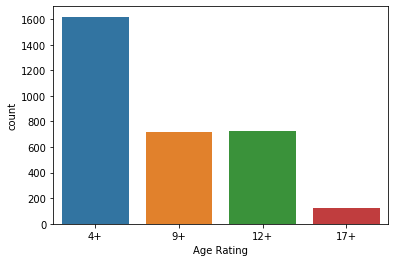

In [30]:
sea.countplot(games['Age Rating'])

In [34]:
games['Genres'][0:10]

0                  Puzzle
1                   Board
2                   Board
3                  Puzzle
7                   Board
11                 Puzzle
12          Entertainment
13                 Puzzle
14    PuzzleEntertainment
15                  Board
Name: Genres, dtype: object

In [32]:
#working on the Genres feature
#removing the commas, Games, and Strategy from the Genres
for i in list(games.index.values):
    games['Genres'][i]=games['Genres'][i].replace(' ','')
    games['Genres'][i]=games['Genres'][i].replace(',','')
    games['Genres'][i]=games['Genres'][i].replace('Games','')
    games['Genres'][i]=games['Genres'][i].replace('Strategy','')

C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_laun

In [33]:
#checking for null values in Genres
games['Genres'].isnull().sum()

0

In [35]:
#getting the count of the Genres having Entertainment
c=0
for i in list(games.index.values):
    if('Entertainment' in games['Genres'][i]):
        c=c+1
c

1667

In [52]:
#putting the Genres in certain categories
for i in list(games.index.values):
    if('Entertainment' in games['Genres'][i] or 'Music' in games['Genres'][i] or 'Casual' in games['Genres'][i]):
        games['Genres'][i]='Entertainment'
    elif('Puzzle' in games['Genres'][i] or 'Board' in games['Genres'][i] or 'Card' in games['Genres'][i]):
        games['Genres'][i]='Puzzle'
    elif('Action' in games['Genres'][i] or 'Adventure' in games['Genres'][i] or 'Simulation' in games['Genres'][i] or 'Sports' in games['Genres'][i] or 'RolePlaying' in games['Genres'][i]):
        games['Genres'][i]='Action'
    elif('Family' in games['Genres'][i] or 'Education' in games['Genres'][i] or 'Word' in games['Genres'][i] or 'Books' in games['Genres'][i] or 'Lifestyle' in games['Genres'][i]):
        games['Genres'][i]='Education'
    else:
        games['Genres'][i]='Entertainment'

C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\harry\Anaconda3\lib\site-packages\ipykernel_launche

In [53]:
games['Genres'].unique()

array(['Puzzle', 'Entertainment', 'Action', 'Education'], dtype=object)

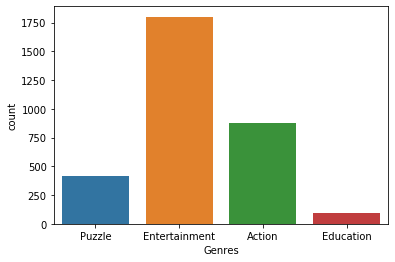

In [54]:
sea.countplot(games['Genres'])

In [55]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 16718
Data columns (total 10 columns):
Average User Rating             3190 non-null float64
User Rating Count               3190 non-null float64
Price                           3190 non-null float64
In-app Purchases                3190 non-null float64
Age Rating                      3190 non-null object
Size                            3190 non-null float64
Genres                          3190 non-null object
Original Release Date           3190 non-null datetime64[ns]
Current Version Release Date    3190 non-null datetime64[ns]
Days                            3190 non-null object
dtypes: datetime64[ns](2), float64(5), object(3)
memory usage: 434.1+ KB


## Data Cleaning Process Ends Here

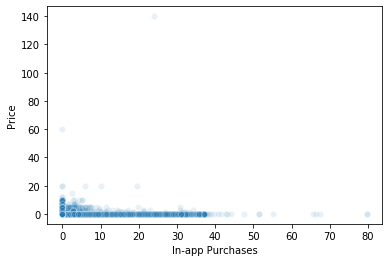

In [59]:
#examining the relationship between the Price and In-app Purchases features
sea.scatterplot(data=games,x='In-app Purchases',y='Price',alpha=0.1)

#### Inference :
Most games have Price = 0.00 and earn money through In-app Purchases.
For some games that have their Price greater than 0, it's mostly less than 20 and these games mostly don't have In-app Purchases

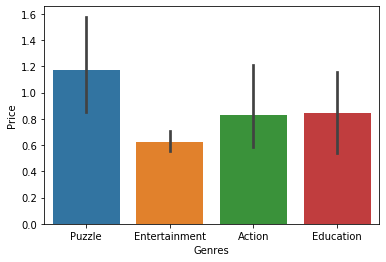

In [133]:
#Genres Vs Price
sea.barplot(data=games,x='Genres',y='Price')

### Inference :
The trends in Pricing of various Genres are as follows :<br>
Puzzle : ~ 1.2 dollars<br>
Entertainment : 0.6 - 0.8 dollars <br>
Action : 0.8 - 1.0 dollars <br>
Education : 0.8 - 1.0 dollars <br>
Thus, we conclude that Entertainment Games are cheaper for the customer while the Puzzle games are comparatively more expensive.

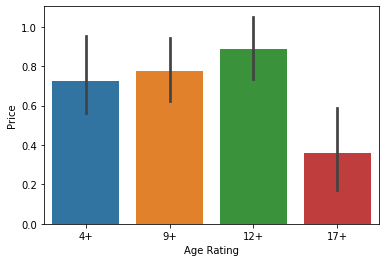

In [134]:
#Age Rating Vs Price
sea.barplot(data=games,x='Age Rating',y='Price')

### Inference :
The trends in Pricing with Age Rating are as follows :<br>
4+ : 0.6-0.8 dollars<br>
9+ : ~ 0.8 dollars<br>
12+ : 0.8-1.0 dollars<br>
17+ : ~ 0.4 dollars<br>
Thus, we conclude that 12+ Rating games are the most expensive, while 17+ Rating games are the least expensive.

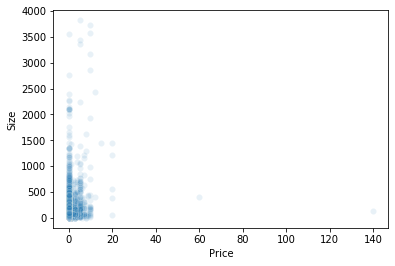

In [136]:
#Size Vs Price
sea.scatterplot(data=games,x='Price',y='Size',alpha=0.1)

### Inference :
As is clear from the plot above, the majority of the games are concentrated in Price Range of 0-10 dollars with Sizes in the range of 0-1000 MB

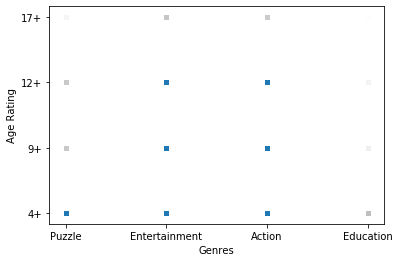

In [70]:
#examining the relationship between Genres and Age Rating
sea.scatterplot(data=games,x='Genres',y='Age Rating',alpha=0.002)

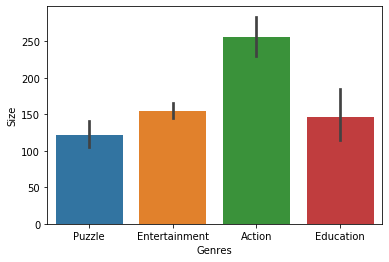

In [72]:
#examining the relationship between Genres and Size of the games
sea.barplot(data=games,x='Genres',y='Size')

### Inference :
The Size associated with each Genre is as follows:<br>
Puzzle : 100-150 MB ;<br>
Entertainment : 150 MB ;<br>
Action : 250 MB and above ;<br>
Education : 150 MB

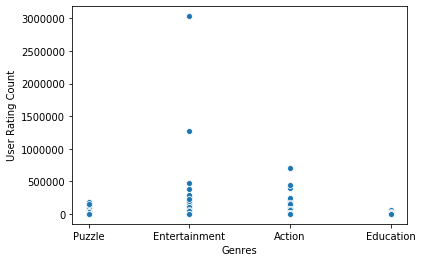

In [78]:
#examining the relationship of various features with the User Rating Count feature
#User Rating Count Vs Genres
sea.scatterplot(data=games,x='Genres',y='User Rating Count')

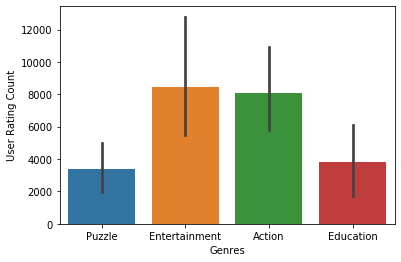

In [79]:
sea.barplot(data=games,x='Genres',y='User Rating Count')

### Inference :
Assuming that the User Rating Count is a representative of the number of downloads, we can infer that :<br>
No. of Entertainment Users = 8000-10000 ;<br>
No. of Action Users = 8000 ;<br>
No. of Puzzle Users = 3000-4000 ;<br>
No. Education Users = 4000<br>

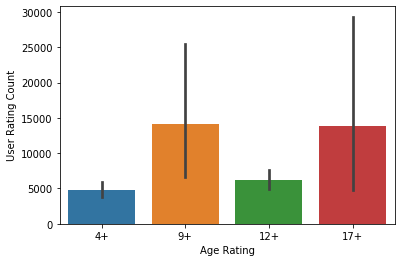

In [80]:
#User Rating Count Vs Age Rating
sea.barplot(data=games,x='Age Rating',y='User Rating Count')

### Inference :
The trend of Age Rating with the number of download is as follows :<br>
4+ : 5000 ;<br>
9+ : 15000;<br>
12+ : 5000-10000<br>
17+ : slighly below 15000

[(0, 10000), (0, 500)]

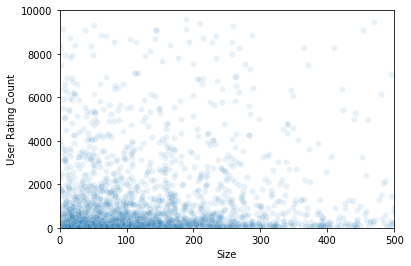

In [90]:
#User Rating Count Vs Size
sea.scatterplot(data=games,x='Size',y='User Rating Count',alpha=0.1).set(xlim=(0,500),ylim=(0,10000))

### Inference :
As is clear from the scatter plot, the User Rating Count is concentrated in games whose size is in the range of 0-400 MB

[(0, 5000), (0, 40)]

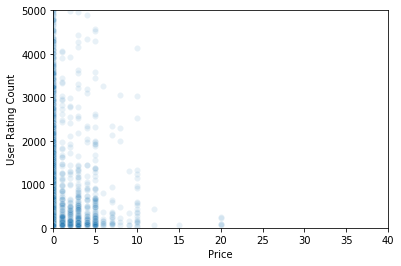

In [94]:
#User Rating Count Vs Price
sea.scatterplot(data=games,x='Price',y='User Rating Count',alpha=0.1).set(ylim=(0,5000),xlim=(0,40))

### Inference :
As can be seen from the plot, for higher downloads the price range for the games should be 0-10 dollars

[(10000, 50000)]

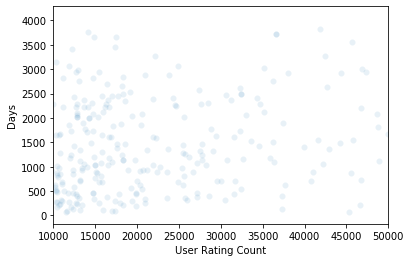

In [101]:
#User Rating Count Vs Update Gap
sea.scatterplot(data=games,y='Days',x='User Rating Count',alpha=0.1).set(xlim=(10000,50000))]

[(0, 6)]

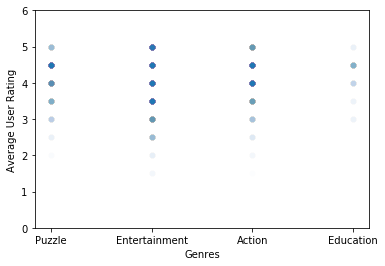

In [112]:
#examining various features for obtaining a good Average User Rating (4.0/5.0 or more)
#plotting various features against Average User Rating
#Average User Rating Vs Genres
sea.scatterplot(data=games,x='Genres',y='Average User Rating',alpha=0.01).set(ylim=(0,6))

In [113]:
ce=0 #entertainment
cp=0 #puzzle
ced=0 #education
ca=0 #action
for i in list(games.index.values):
    if(games['Average User Rating'][i]>=4.0):
        if('Entertainment' in games['Genres'][i]):
            ce=ce+1
        elif ('Puzzle' in games['Genres'][i]):
            cp=cp+1
        elif ('Education' in games['Genres'][i]):
            ced=ced+1
        elif ('Action' in games['Genres'][i]):
            ca=ca+1
genre_count=[ce,cp,ced,ca]    

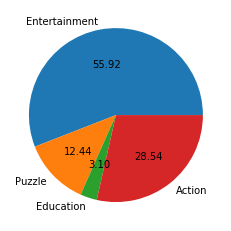

In [116]:
import matplotlib.pyplot as pltr
pielabels=['Entertainment','Puzzle','Education','Action']
pltr.pie(genre_count,labels=pielabels,autopct='%1.2f')
pltr.show()

### Inference :
Genre Wise Plot of Average User Rating >= 4.0<br>
Entertainment = 55.92 % ;<br>
Puzzle = 12.44 % ;<br>
Education = 3.10 % ;<br>
Action = 28.54 % ;<br>
Hence, to get a good Average User Rating we should pick a Genre of Entertainment

[(0, 20)]

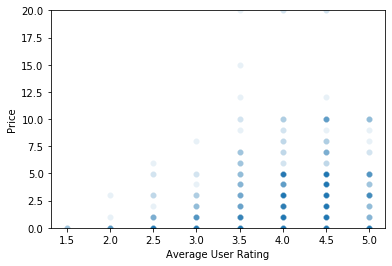

In [126]:
#Average User Rating Vs Price
sea.scatterplot(data=games,x='Average User Rating',y='Price',alpha=0.1).set(ylim=(0,20))

### Inference :
To get a good Average User Rating the Price should be in the range 0-10 dollars

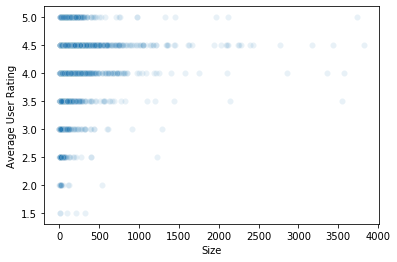

In [131]:
#Average User Rating Vs Size
sea.scatterplot(data=games,y='Average User Rating',x='Size',alpha=0.1)

### Inference :
As can be seen from the plot above, we can achieve a good Average User Rating by keeping the Size in the range 0-1000 MB

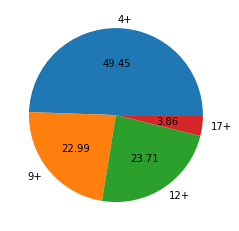

In [132]:
#Average User Rating Vs Age Rating
c4=0 #4+
c9=0 #9+
c12=0 #12+
c17=0 #17+
for i in list(games.index.values):
    if(games['Average User Rating'][i]>=4.0):
        if('4+' in games['Age Rating'][i]):
            c4=c4+1
        elif('9+' in games['Age Rating'][i]):
            c9=c9+1
        elif('12+' in games['Age Rating'][i]):
            c12=c12+1
        elif('17+' in games['Age Rating'][i]):
            c17=c17+1
age_count=[c4,c9,c12,c17]
label_age=['4+','9+','12+','17+']
pltr.pie(age_count,labels=label_age,autopct='%1.2f')
pltr.show()

### Inference :
The trend for Age Rating for games with good Average User Rating : <br>
4+ : 49.45 % ;<br>
9+ : 22.99 % ;<br>
12+ : 23.71 % ;<br>
17+ : 3.86 % ;<br>
Hence, we can infer that to achieve a good Average User Rating we should set the Age Rating to 4+

# INFERENCES MADE :

1. Most developers keep the Price of the games at 0.0 USD and earn money through In-app Purchases. The Upper Limit on the Price of the games is 20.0 USD and if the games have initial purchasing cost, then they don't opt for In-app Purchases. <br>
2. The trends in Pricing of various Genres are as follows :<br>
    Puzzle : ~ 1.2 dollars<br>
    Entertainment : 0.6 - 0.8 dollars <br>
    Action : 0.8 - 1.0 dollars <br>
    Education : 0.8 - 1.0 dollars <br>
Thus, we conclude that Entertainment Games are cheaper for the customer while the Puzzle games are comparatively more expensive.<br>
3. The trends in Pricing with Age Rating are as follows :<br>
    4+ : 0.6-0.8 dollars<br>
    9+ : ~ 0.8 dollars<br>
    12+ : 0.8-1.0 dollars<br>
    17+ : ~ 0.4 dollars<br>
Thus, we conclude that 12+ Rating games are the most expensive, while 17+ Rating games are the least expensive.<br>
4. The majority of the games are concentrated in Price Range of 0-10 dollars with Sizes in the range of 0-1000 MB <br><br><br>
5. The Size associated with each Genre is as follows:<br>
    Puzzle : 100-150 MB ;<br>
    Entertainment : 150 MB ;<br>
    Action : 250 MB and above ;<br>
    Education : 150 MB<br>
Thus, we can infer that Action Games are comparatively larger in size whereas Puzzle Games are fairly smaller in size.<br>
6. Assuming that the User Rating Count is a representative of the number of downloads, we can infer that :<br>
    No. of Entertainment Users = 8000-10000 ;<br>
    No. of Action Users = 8000 ;<br>
    No. of Puzzle Users = 3000-4000 ;<br>
    No. Education Users = 4000<br>
7. The trend of Age Rating with the number of download is as follows :<br>
    4+ : 5000 ;<br>
    9+ : 15000;<br>
    12+ : 5000-10000<br>
    17+ : slighly below 15000<br>
8. The User Rating Count is concentrated in games whose size is in the range of 0-400 MB.<br>
9. For higher downloads the price range for the games should be 0-10 dollars.<br>
10. Thus , we can infer from the above inferences that for a developer to target higher number of downloads, they should develop the game according to the following attributes : <br>
    Genre : Entertainment<br>
    Age Rating : 9+/17+ <br>
    Size : 0-400 MB <br>
    Price Range : 0-10 USD <br>
<br><br>
11. Genre Wise Plot of Average User Rating >= 4.0<br>
    Entertainment = 55.92 % ;<br>
    Puzzle = 12.44 % ;<br>
    Education = 3.10 % ;<br>
    Action = 28.54 % ;<br>
Hence, to get a good Average User Rating we should pick a Genre of Entertainment.<br>
12. To get a good Average User Rating the Price should be in the range 0-10 dollars.<br>
13. We can achieve a good Average User Rating by keeping the Size in the range 0-1000 MB.<br>
14. The trend for Age Rating for games with good Average User Rating : <br>
    4+ : 49.45 % ;<br>
    9+ : 22.99 % ;<br>
    12+ : 23.71 % ;<br>
    17+ : 3.86 % ;<br>
Hence, we can infer that to achieve a good Average User Rating we should set the Age Rating to 4+<br>
15. From the above inferences, we can infer that to achieve a good Average User Rating (4.0/5.0 or above), the game should have the following attributes : <br>
    Genre : Entertainment<br>
    Price : 0-10 USD <br>
    Size : 0-1000 MB <br>
    Age Rating : 4+<br>